# Top2Vec

## Bibliotheken und Daten importieren

In [1]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

from tqdm import tqdm
import pandas as pd
import numpy as np
from top2vec import Top2Vec

tqdm.pandas()

In [102]:
df = pd.read_parquet('2023-06-16_gesamtdaten_bis_2022.parquet')

In [5]:
df = pd.read_parquet('2023-06-16_gesamtdaten_bis_2022.parquet')
df = df[['index_doc','datum', 'kommunale_ebene', 'kommune', 'text', 'doc_typ']]
frankenthal = df[df['kommune'] == 'Frankenthal']
schwetzingen = df[df['kommune'] == 'Schwetzingen']
lampertheim = df[df['kommune'] == 'Lampertheim']
kreis_bergstrasse = df[df['kommune'] == 'Kreis Bergstraße']

In [7]:
df_text = df['text'].tolist()
frankenthal_text = frankenthal['text'].tolist()
schwetzingen_text = schwetzingen['text'].tolist()
lampertheim_text = lampertheim['text'].tolist()
kreis_bergstrasse_text = kreis_bergstrasse['text'].tolist()

## Gesamter Datensatz

In [9]:
model = Top2Vec(df_text)

2023-06-16 18:50:02,002 - top2vec - INFO - Pre-processing documents for training
2023-06-16 18:58:27,277 - top2vec - INFO - Creating joint document/word embedding
2023-06-17 01:15:53,196 - top2vec - INFO - Creating lower dimension embedding of documents
2023-06-17 01:17:22,513 - top2vec - INFO - Finding dense areas of documents
2023-06-17 01:17:29,869 - top2vec - INFO - Finding topics


In [10]:
model.save("top2vec_gesamter_datensatz")

In [2]:
model = Top2Vec.load("data/top2vec_models/top2vec_gesamter_datensatz")

In [82]:
df = pd.read_parquet("data/raw/2023-06-23_gesamtdaten_rhein_neckar.parquet")

In [84]:
df.drop(columns=['top2_vec_document_scores','top2vec_topic'], inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68663 entries, 0 to 68662
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   text               68663 non-null  object        
 1   datum              68663 non-null  datetime64[ns]
 2   doc_name           66889 non-null  object        
 3   file_urls          58062 non-null  object        
 4   gremium            68663 non-null  object        
 5   kommunale_ebene    68558 non-null  object        
 6   kommune            68663 non-null  object        
 7   datei_name         59282 non-null  object        
 8   rel_path_to_file   59282 non-null  object        
 9   sitzung_nr         67825 non-null  float64       
 10  beschlussstatus    16136 non-null  object        
 11  top_name           56011 non-null  object        
 12  top_nr             68663 non-null  object        
 13  vorlage_nr         68663 non-null  object        
 14  ocr   

In [11]:
model.get_num_topics()

820

In [12]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [13]:
topic_words, word_scores, topic_nums = model.get_topics(37)
for words, scores, nums in zip(topic_words, word_scores, topic_nums):
  print("Topic Number: ",nums)
  print(f"Words: {words}")
  print("\n")

Topic Number:  0
Words: ['³³' 'oznm' 'ei' 'ozn' 'oznr' 'hi' 'ih' 'lei' 'ss' 'ir' 'fe' 'age' 'elle'
 'au' 'bi' 'zen' 'ie' 'oo' 'mer' 'are' 'ya' 'aan' 'ale' 'tre' 'fu' 'el'
 'ste' 'sur' 'rer' 'un' 'iu' 'ce' 'were' 'ut' 'nne' 'ai' 'ele' 'fre' 'ry'
 'on' 'ell' 'eee' 'ran' 'een' 'pen' 'tra' 'ji' 'br' 'za' 'em']


Topic Number:  1
Words: ['dokument' 'beratungsstatus' 'beiliegende' 'eingereicht' 'bearbeiter'
 'betreff' 'unterhalt' 'vorlagen' 'endgultige' 'beiliegenden'
 'drittmittel' 'referenzvorlage' 'behandlung' 'daniela' 'eingegangen'
 'hauptverwaltung' 'empfehlende' 'anfrage' 'kardos' 'mike' 'fws'
 'theresia' 'prufantrag' 'abteilung' 'swg' 'per' 'mohler' 'beiliegend'
 'welter' 'nurtingen' 'fundstelle' 'ernst' 'information' 'beratungsfolge'
 'externes' 'mitberatung' 'laufender' 'verwahrkonten' 'bundnis' 'nein'
 'chinesischen' 'betrag' 'termin' 'bast' 'jennifer' 'oehlmann'
 'aktionsbundnis' 'mayors' 'rostek' 'digitale']


Topic Number:  2
Words: ['pladiert' 'hezel' 'pender' 'bekunden' 'disk

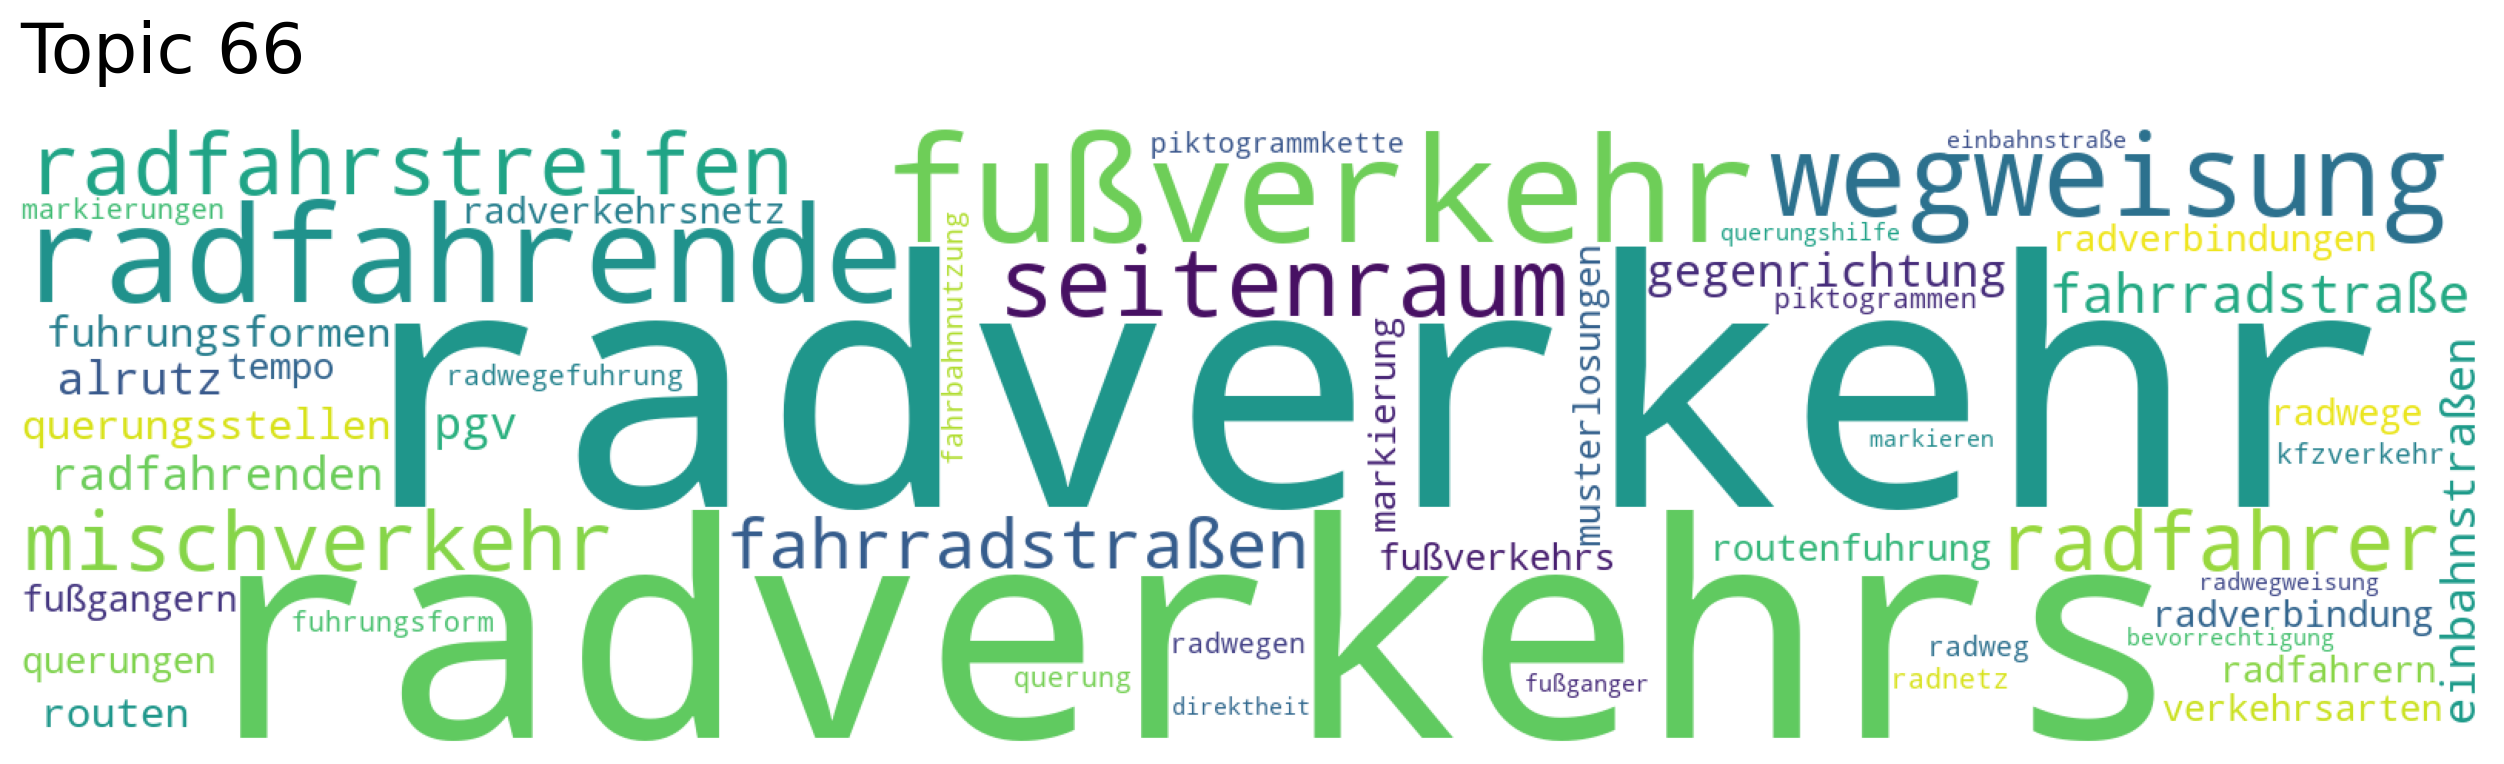

In [7]:
model.generate_topic_wordcloud(66, background_color='white')

In [36]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["ladesaule"], num_topics=30)

for words, scores, nums in zip(topic_words, word_scores, topic_nums):
  print("Topic Number: ",nums)
  print(f"Words: {words}")
  print("\n")

Topic Number:  341
Words: ['hhr' 'anzahlung' 'landeszuwendung' 'arbeitmittel' 'feuerwehrautos'
 'sarnierung' 'immaterieller' 'bve' 'geleisteter' 'westrandstraße'
 'musikanlage' 'sperrvermerk' 'rennbahnstraße' 'neuausstattung'
 'fernseher' 'neuanschaffung' 'kostenanpassung' 'fohlenweide' 'vfb'
 'paulusheim' 'unimog' 'pauschalansatz' 'lehmgrubenweg' 'sopo'
 'betragsangaben' 'mbst' 'abrechn' 'westschulhaus' 'wippe' 'spulmaschine'
 'fluchttreppe' 'ursprungsdaten' 'restarbeiten' 'smartboards'
 'telefonanlage' 'prov' 'wab' 'kleinmaßnahmen' 'parkfriedhof' 'rasenmaher'
 'anschaffung' 'wingertsweg' 'mbs' 'laptop' 'teilprojekt' 'erdcontainer'
 'pauluskirche' 'rutsche' 'gemeindestraßen' 'kunterbunt']


Topic Number:  345
Words: ['parkgebuhr' 'hochstparkdauer' 'parkschein' 'parkzeit' 'brotchentaste'
 'parkentgelte' 'kurzzeitparken' 'parkgebuhren' 'tagesticket' 'parkdauer'
 'stunde' 'parkscheibe' 'kurzparker' 'wildemannstraße' 'gebuhrenfrei'
 'kurzzeitparker' 'dauerparker' 'messplatz' 'kostenfreies

Notizen:
* 27: ÖV
* 66: Fahrrad
* 74: Allgemein
* 117: Bahn (ÖV)
* 121: ÖV
* 155: Allgemein
* 160: Allgemein
* 200: Lärm
* 295: ÖV
* 278: Neue Mobilität
* 300: Allgemein
* 313: Fahrrad
* 355: Allgemein
* 425: MIV
* 456: Parken
* 457: Parken
* 488: ÖV
* 586: ÖV
* 706: Allgemein


Notizen:
* Es können verschiedene verkehrliche Themen gefunden werden
* Top2Vec benötigt einen großen Korpus
* Einfache Handhabung, da keine Themenanzahl angegeben werden muss
* Suche nach Themen mit Hilfe von Schlüsselbegriffen ist relativ einfach

In [73]:
themengruppen = {
    'Allgemein': [32, 35, 62, 74, 155, 160, 117, 178, 191, 200, 270, 300, 335, 494, 638, 706, 712, 741],
    'MIV': [340],
    'Parken': [345, 456, 547],
    'E-Mobilität': [],
    'ÖV': [27,  121, 208, 295, 408, 586],
    'Fahrrad': [66, 313, 425],
    'Gehen': [20, 250, 275],
    'Neue Mobilität': [278]
}
relevante_themen = [top_nr for key in themengruppen for top_nr in themengruppen[key]]

In [113]:
pd.DataFrame.from_dict(themengruppen)

ValueError: All arrays must be of the same length

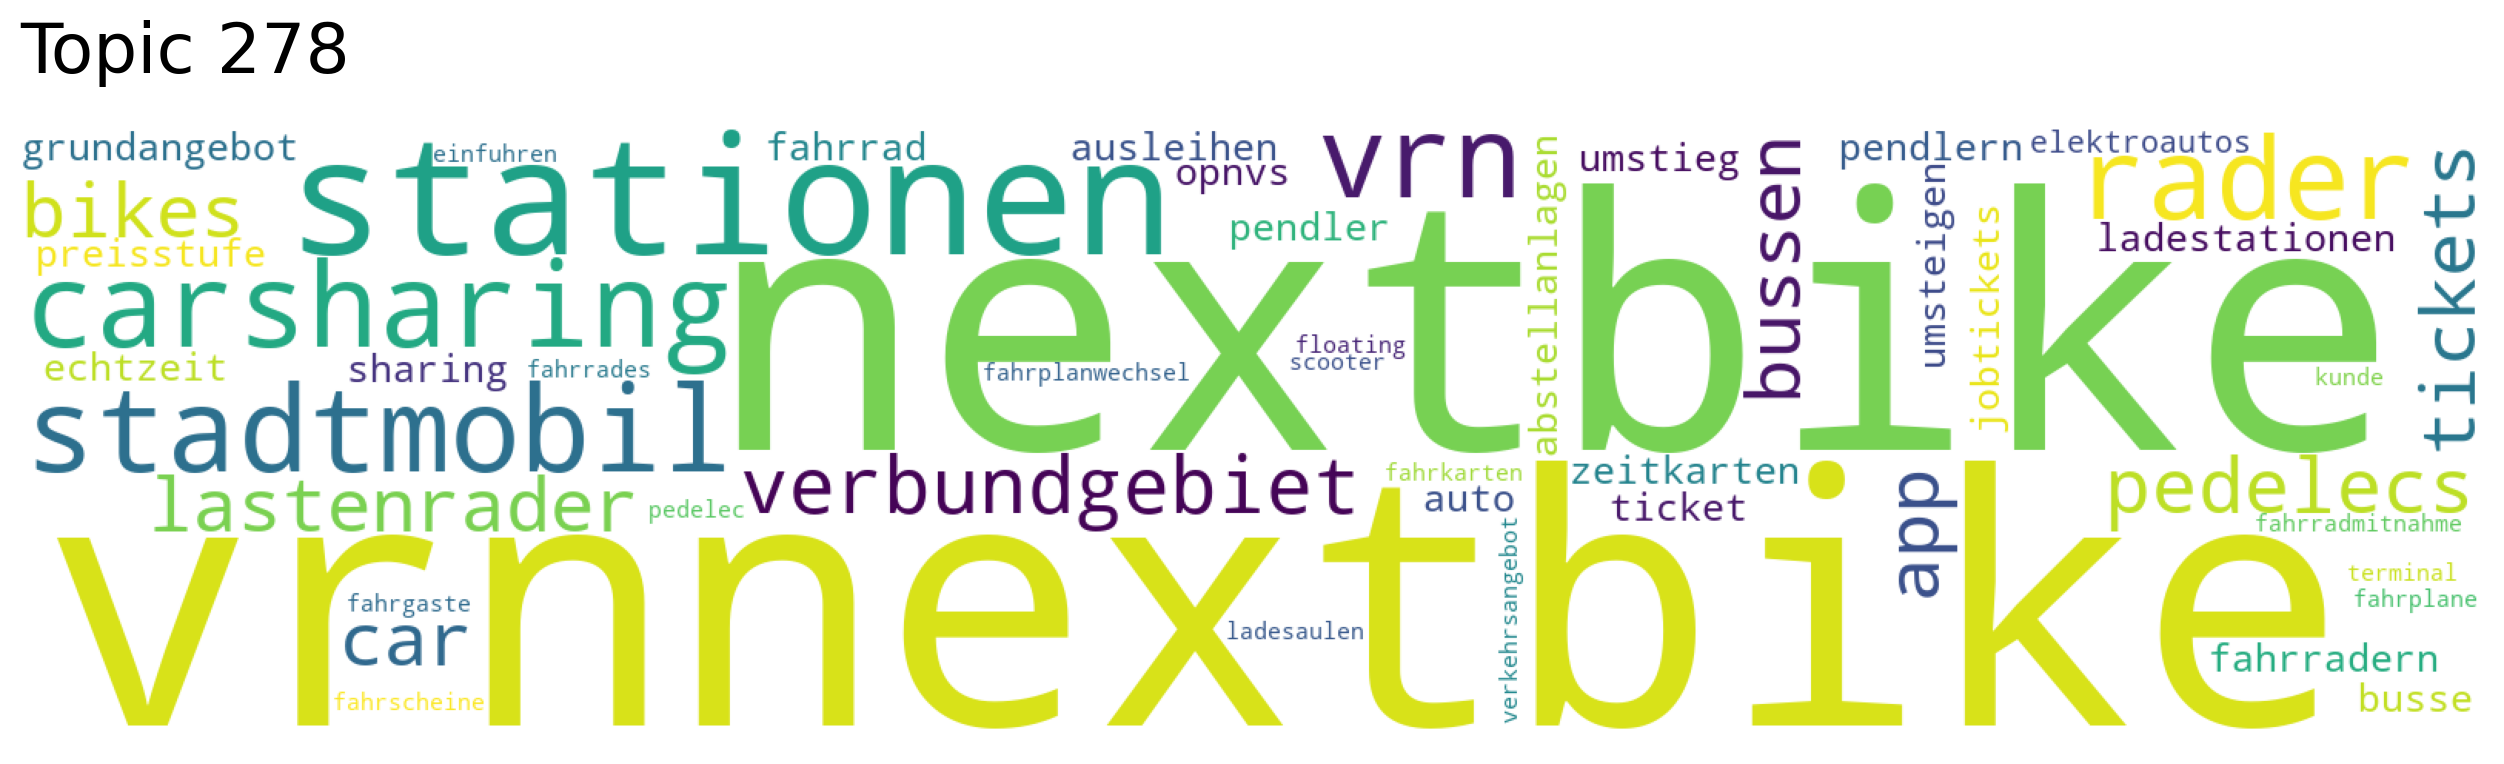

In [72]:
model.generate_topic_wordcloud(278, background_color='white')

In [74]:
nr_to_topic = {topic_nr: key for key, value in themengruppen.items() for topic_nr in value}

In [75]:
topic_sizes, topic_nums = model.get_topic_sizes()

def get_documents_of_topic(top_nr: int):
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=top_nr, 
                                                                                       num_docs=topic_sizes[top_nr])
    df_topics = pd.DataFrame()
    df_topics['top2vec_document_id'] = document_ids
    df_topics['top2_vec_document_scores'] = document_scores
    df_topics['top2vec_topic'] = top_nr

    return df_topics

In [86]:
alle_dokumente = [get_documents_of_topic(thema) for thema in relevante_themen]
df_topics = pd.concat(alle_dokumente)

df_topics['top2vec_topic'] = df_topics['top2vec_topic'].map(nr_to_topic)

df = df.merge(df_topics, left_on='index_doc', right_on='top2vec_document_id', how="left")

df.drop(columns='top2vec_document_id', axis=1, inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68663 entries, 0 to 68662
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   text                      68663 non-null  object        
 1   datum                     68663 non-null  datetime64[ns]
 2   doc_name                  66889 non-null  object        
 3   file_urls                 58062 non-null  object        
 4   gremium                   68663 non-null  object        
 5   kommunale_ebene           68558 non-null  object        
 6   kommune                   68663 non-null  object        
 7   datei_name                59282 non-null  object        
 8   rel_path_to_file          59282 non-null  object        
 9   sitzung_nr                67825 non-null  float64       
 10  beschlussstatus           16136 non-null  object        
 11  top_name                  56011 non-null  object        
 12  top_nr            

In [108]:
df["jahr"] = df['datum'].dt.strftime('%Y')

In [79]:
df.to_parquet('data/raw/2023-07-08_gesamtdaten_rhein_neckar.parquet')

### Dokumentzuordnungen visualisieren

In [3]:
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from my_plot import set_size
import pandas as pd
import numpy as np

%matplotlib inline
width = 'thesis'

In [4]:
df = pd.read_parquet("data/raw/2023-07-10_gesamtedaten_rhein_neckar2.parquet")

In [5]:
df_top2vec = df[df['top2vec_topic'].notna()]

In [6]:
df_top2vec_sub = df_top2vec[['jahr', 'kommune', 'doc_typ', 'top2vec_topic']]

In [7]:
df_top2vec_kommune_cross = pd.crosstab(df.kommune, df.top2vec_topic)

In [107]:
df_top2vec_kommune_cross

top2vec_topic       Allgemein  Fahrrad  Gehen  MIV  Neue Mobilität  Parken  \
kommune                                                                      
Bad Dürkheim              153        8      2    2               3       2   
Bad Friedrichshall         34        5      4    3               1       0   
Bad Rappenau               53        1      0    6               0       3   
Frankenthal               375       12     10    0              18      21   
Hassloch                   27        0      1    3               0       0   
Heppenheim                 57       15    353    1               3       5   
Hockenheim                 46       10      2    4               3      10   
Homburg                     4        2      2    0               0       0   
Kreis Bad Dürkheim         16        2      0    0               0       0   
Kreis Bergstraße            9       10      1    0               0       0   
Kreis Germersheim           0        1      0    0               1       1   
Kreis Heilbronn            22       14      0    1               1       1   
Lampertheim               116        8     11    2               9      21   
Landau                    354       12      5    2               8      21   
Leimen                      4        1      0    0               0       0   
Pirmasens                 119        8      3    4               0       9   
Rhein-Neckar-Kreis          4        2      0    0               1       0   
Rhein-Pfalz-Kreis          12       70      1    0               2       0   
Schifferstadt              47        1     60    8               0       6   
Schwetzingen               84       39      9   24              14      30   
Speyer                    245       37     12    0               8       7   
Viernheim                  76       20     53    3               0      12   
Weinheim                    2        1      0    0               0       1   
Wiesloch                   11       24      1    1               0       0   
Wörth am Rhein             34        3      1    1               0       1   

top2vec_topic        ÖV  
kommune                  
Bad Dürkheim          7  
Bad Friedrichshall    9  
Bad Rappenau          7  
Frankenthal          70  
Hassloch              4  
Heppenheim           19  
Hockenheim            9  
Homburg               1  
Kreis Bad Dürkheim   37  
Kreis Bergstraße    173  
Kreis Germersheim    21  
Kreis Heilbronn      32  
Lampertheim          70  
Landau               38  
Leimen                0  
Pirmasens             9  
Rhein-Neckar-Kreis   23  
Rhein-Pfalz-Kreis    21  
Schifferstadt         8  
Schwetzingen         29  
Speyer               90  
Viernheim             7  
Weinheim              0  
Wiesloch              2  
Wörth am Rhein        9

In [108]:
df_top2vec_kommune_cross.loc[kommunen_order]

top2vec_topic       Allgemein  Fahrrad  Gehen  MIV  Neue Mobilität  Parken  \
kommune                                                                      
Bad Dürkheim              153        8      2    2               3       2   
Bad Friedrichshall         34        5      4    3               1       0   
Bad Rappenau               53        1      0    6               0       3   
Frankenthal               375       12     10    0              18      21   
Hassloch                   27        0      1    3               0       0   
Heppenheim                 57       15    353    1               3       5   
Hockenheim                 46       10      2    4               3      10   
Homburg                     4        2      2    0               0       0   
Lampertheim               116        8     11    2               9      21   
Landau                    354       12      5    2               8      21   
Leimen                      4        1      0    0               0       0   
Pirmasens                 119        8      3    4               0       9   
Schwetzingen               84       39      9   24              14      30   
Schifferstadt              47        1     60    8               0       6   
Speyer                    245       37     12    0               8       7   
Viernheim                  76       20     53    3               0      12   
Weinheim                    2        1      0    0               0       1   
Wiesloch                   11       24      1    1               0       0   
Wörth am Rhein             34        3      1    1               0       1   
Kreis Bad Dürkheim         16        2      0    0               0       0   
Kreis Bergstraße            9       10      1    0               0       0   
Kreis Germersheim           0        1      0    0               1       1   
Kreis Heilbronn            22       14      0    1               1       1   
Rhein-Neckar-Kreis          4        2      0    0               1       0   
Rhein-Pfalz-Kreis          12       70      1    0               2       0   

top2vec_topic        ÖV  
kommune                  
Bad Dürkheim          7  
Bad Friedrichshall    9  
Bad Rappenau          7  
Frankenthal          70  
Hassloch              4  
Heppenheim           19  
Hockenheim            9  
Homburg               1  
Lampertheim          70  
Landau               38  
Leimen                0  
Pirmasens             9  
Schwetzingen         29  
Schifferstadt         8  
Speyer               90  
Viernheim             7  
Weinheim              0  
Wiesloch              2  
Wörth am Rhein        9  
Kreis Bad Dürkheim   37  
Kreis Bergstraße    173  
Kreis Germersheim    21  
Kreis Heilbronn      32  
Rhein-Neckar-Kreis   23  
Rhein-Pfalz-Kreis    21

In [8]:
kommunen_order = ['Bad Dürkheim', 'Bad Friedrichshall', 'Bad Rappenau',
       'Frankenthal', 'Hassloch', 'Heppenheim', 'Hockenheim', 'Homburg',
       'Lampertheim', 'Landau', 'Leimen', 'Pirmasens', 'Schwetzingen',
       'Schifferstadt', 'Speyer', 'Viernheim', 'Weinheim', 'Wiesloch',
       'Wörth am Rhein', 'Kreis Bad Dürkheim', 'Kreis Bergstraße',
       'Kreis Germersheim', 'Kreis Heilbronn', 'Rhein-Neckar-Kreis',
       'Rhein-Pfalz-Kreis']

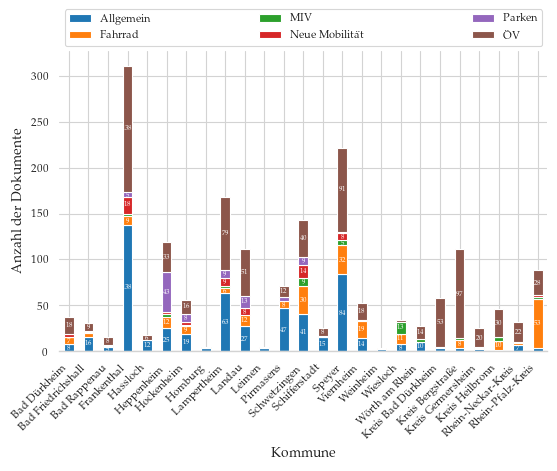

In [12]:
ax = df_top2vec_kommune_cross.loc[kommunen_order].plot(kind = 'bar', stacked = True, figsize=set_size(width))

plt.xlabel ("Kommune")
plt.ylabel ("Anzahl der Dokumente")
# fig.autofmt_xdate(rotation=45)
ax.set_xticklabels(kommunen_order, rotation = 45, ha='right')
# plt.legend(ncol=3)
sns.set_style("whitegrid")
plt.style.use('tex.mplstyle')

plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3)
for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width_x = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width_x / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 4:
        ax.text(label_x, label_y, label_text, ha='center', va='center', color='white', fontsize=5)
sns.despine(left=True)

fig = ax.get_figure()

fig.savefig('../../latex/Figures/plots/top2vec_kommunen_verkehr.pdf', format='pdf', bbox_inches='tight')

In [13]:
stichwortgruppen = ['Allgemein', 'MIV', 'Parken', 'Fahrrad', 'Gehen', 'ÖV', 'Neue Mobilität']

In [23]:
df_top2vec_sub[['jahr', 'top2vec_topic']].groupby('jahr', as_index=False).value_counts()

jahr   top2vec_topic  count
0   2001       Allgemein      2
1   2002       Allgemein      1
2   2003       Allgemein      2
3   2003              ÖV      2
4   2004       Allgemein     11
..   ...             ...    ...
95  2022       Allgemein     54
96  2022         Fahrrad     34
97  2022             MIV     17
98  2022          Parken     15
99  2022  Neue Mobilität     11

[100 rows x 3 columns]

In [20]:
df_top2vec_year_cross = pd.crosstab(df.jahr, df.top2vec_topic, aggfunc='sum')

ValueError: aggfunc cannot be used without values.

In [19]:
pd.melt(df_top2vec_year_cross, id_vars='jahr')

KeyError: 'jahr'

In [15]:
df_total_count_per_year = df_top2vec_sub.groupby('jahr', as_index=False)[stichwortgruppen].sum()

KeyError: "Columns not found: 'MIV', 'Neue Mobilität', 'Fahrrad', 'ÖV', 'Gehen', 'Parken', 'Allgemein'"

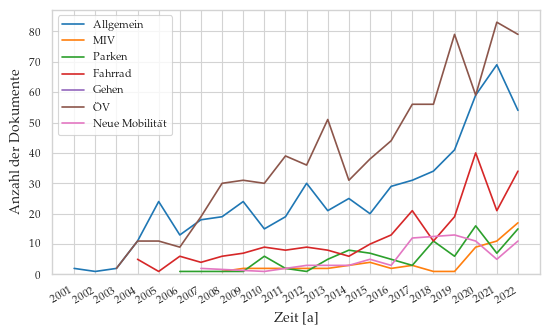

In [25]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))

sns.lineplot(x='jahr' ,y='count', data=df_top2vec_sub[['jahr', 'top2vec_topic']].groupby('jahr', as_index=False).value_counts(), 
             hue='top2vec_topic', hue_order=stichwortgruppen)
ax.set(xlabel='Zeit [a]', ylabel='Anzahl der Dokumente')

ax.set_ylim(bottom=0)
ax.legend_.set_title(None)
fig.autofmt_xdate()
plt.style.use('tex.mplstyle')

fig.savefig('../../latex/Figures/plots/top2vec_docs_gesamt_jahr_verkehr.pdf', format='pdf', bbox_inches='tight')

In [26]:
fallbeispiele = ['Frankenthal', 'Schwetzingen', 'Lampertheim', 'Kreis Bergstraße']

In [28]:
temp = ['jahr', 'kommune', 'top2vec_topic']
df_kommune_per_year_count = df_top2vec_sub[temp].groupby(['jahr', 'kommune'], as_index=False).value_counts()

In [29]:
df_bsp_count_per_year = df_kommune_per_year_count[df_kommune_per_year_count['kommune'].isin(fallbeispiele)]

In [50]:
df_bsp_count_per_year['jahr_int'] = df_bsp_count_per_year['jahr'].astype(int)

C:\Users\johan\AppData\Local\Temp\ipykernel_14748\605789991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bsp_count_per_year['jahr_int'] = df_bsp_count_per_year['jahr'].astype(int)


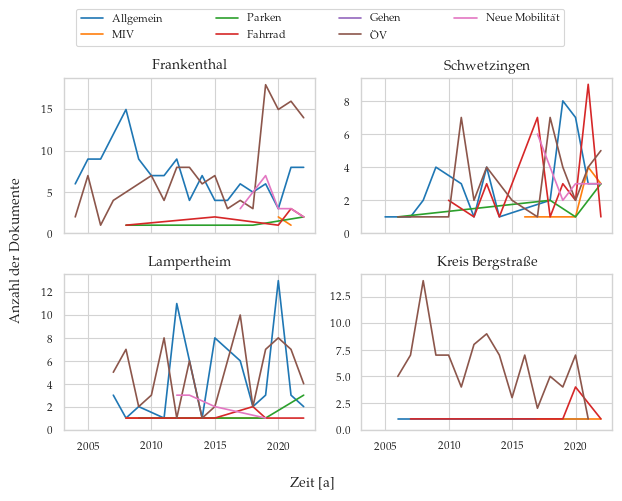

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(6.299212813062128, 4.893127620841233), sharex=True)
temp_list = ['jahr_int']                
for fallbeispiel, ax in zip(fallbeispiele, axes.ravel()):
    # filter df for ticker and plot on specified axes
    df_kommune = df_bsp_count_per_year[df_bsp_count_per_year["kommune"] == fallbeispiel]
    sns.lineplot(data=df_kommune, x='jahr_int',y='count', hue='top2vec_topic', hue_order=stichwortgruppen,ax=ax)

    # chart formatting
    ax.set_title(fallbeispiel, fontsize = 10)
    ax.get_legend().remove()
    ax.set(xlabel=None, ylabel=None)
    ax.set_ylim(bottom=0)
    # ax.set_xlim('2006', '2023')
    ax.locator_params(axis='x', nbins=5)

bb = (fig.subplotpars.left, fig.subplotpars.top+0.04, 
      fig.subplotpars.right-fig.subplotpars.left,.1)
# fig.autofmt_xdate()
axes[0][0].legend(bbox_to_anchor=bb, mode="expand", loc="lower left",
               ncol=4, borderaxespad=0., bbox_transform=fig.transFigure)

plt.style.use('tex.mplstyle')
fig.supxlabel('Zeit [a]', fontsize=10)
fig.supylabel('Anzahl der Dokumente', fontsize=10)

fig.tight_layout()
fig.savefig('../../latex/Figures/plots/top2vec_docs_verkehr_jahr_kommunen_vergleich.pdf', format='pdf', bbox_inches='tight')

In [125]:
fig = px.bar(df_top2vec_kommune_cross,
             # x=df_kommune_gesamt.index,
             # y=['Allgemein', 'MIV', 'Parken', 'Fahrrad', 'Gehen', 'ÖV', 'Neue Mobilität'],
             # color='kommune',
              # hover_name="kommune",
              labels={
                     "jahr": "Zeit (a)",
                     "Gesamt": "Häufigkeit aller Stichwörter",
                     "kommune": "Kommunen",
                     "variable": "Stichwortgruppen",
                     "value": "Häufigkeit"},
              # render_mode="svg",
              template='plotly_white',
              width=800, 
              height=400
             )
fig.show()

Noitzen:
* Deutlich weniger Dokumente selektiert als bei Keyword Search
* Weniger themenspezifische Zuordnung

### Dokumente mit bestimmten Themen suchen

In [39]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=23)

TypeError: Top2Vec.search_documents_by_topic() missing 1 required positional argument: 'num_docs'

In [27]:
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1955, Score: 0.7811113595962524
-----------
 
Beratungsergebnis: 
 
Gremium 
Sitzung am 
Top 
Öffentlich: 
Einstimmig: 
 
Ja-Stimmen: 
 
 
 
 
 
 
Mit 
 
Nein-Stimmen: 
 
 
 
 
Nichtöffentlich: 
Stimmenmehrheit: 
 
Enthaltungen: 
Laut Beschluss- 
vorschlag: 
Protokollanmerkungen und 
Änderungen  
Kenntnisnahme: 
Stellungnahme der Ver- 
waltung ist beigefügt: 
Unterschrift: 
 
 
 
siehe Rückseite: 
 
 
 
Stadtrat der Stadt Frankenthal (Pfalz)  
Drucksache Nr. 
 
XIV. Wahlperiode 2004 – 2009 
XIV/1424  
 
 
Aktenzeichen: 611/Lu/Ra 
Datum:25.10.2007 
Hinweis:   
 
  
 
  
Beratungsfolge:   Haupt- und Finanzausschuss   Stadtrat     
 
 
 
Leistung einer überplanmäßigen Ausgabe von 160.000,-- € bei Hhst. 
6300.133.9510  
Neubaugebiet nördlich der Heßheimer Straße 
 
 
 
Bei der Haushaltsstelle 6300.133.9510 Neubaugebiet nördlich der Heßheimer Str.  
wird der Leistung einer überplanmäßigen Ausgabe in Höhe von 160.000 EUR zuge-
stimmt.  
 
Die überplanmäßige Ausgabe ist zu decken du